In [1]:
import numpy as np
import os 
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import json

In [2]:
with open(os.path.join("OPs_used", "bloodConc.json"), "r") as f:
    bloodConc = json.load(f)
    bloodConc = bloodConc['bloodConc']
with open(os.path.join("OPs_used", "wavelength.json"), 'r') as f:
    wavelength = json.load(f)
    wavelength = wavelength['wavelength']
with open(os.path.join("OPs_used", "SO2.json"), 'r') as f:
    SO2 = json.load(f)
    train_SO2 = SO2['train_SO2']
    test_SO2 = SO2['test_SO2']

In [3]:
file_set = glob(os.path.join('dataset', 'prediction_model_formula3', 'test','*'))
len(file_set)

4000

In [4]:
file_set[0]

'dataset\\prediction_model_formula3\\test\\0_blc_138.npy'

In [5]:
data = np.load(file_set[2000])
data.shape

(51, 805)

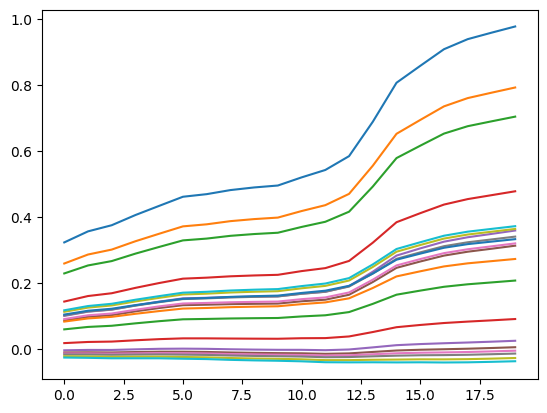

In [6]:
OD_spec = data[25,:800]
for i in range(20):
    plt.plot(OD_spec[i*20:i*20+20])
plt.show()

In [7]:
file_set = glob(os.path.join('dataset', 'surrogate_result', 'test','bloodConc_138', 'SO2_0.7', '*'))
len(file_set)

200

In [77]:
file_set[0]

'dataset\\surrogate_result\\test\\bloodConc_138\\SO2_0.7\\0_test.csv'

In [ ]:
baseline = 

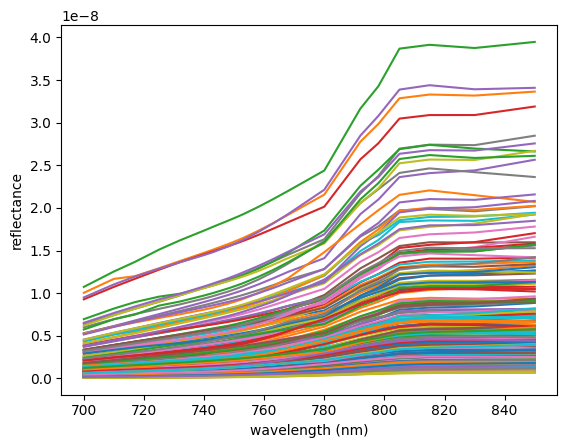

In [75]:
for filename in file_set:
    data = pd.read_csv(filename)
    plt.plot(wavelength, data['largeIJV_SDS2'])
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance')
plt.show()

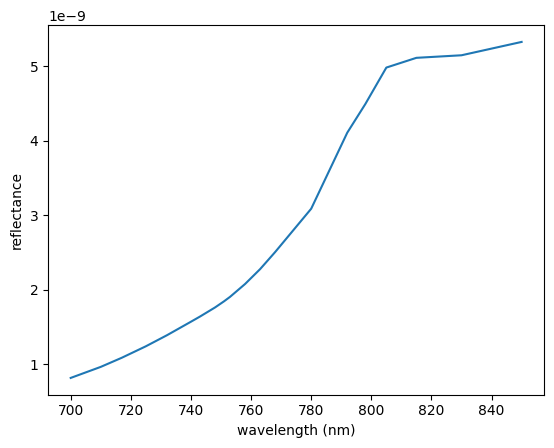

In [21]:
plt.plot(wavelength, data['smallIJV_SDS2'])

plt.show()

In [4]:
with open(os.path.join("OPs_used", "bloodConc.json"), "r") as f:
    bloodConc = json.load(f)
    bloodConc = bloodConc['bloodConc']
with open(os.path.join("OPs_used", "wavelength.json"), 'r') as f:
    wavelength = json.load(f)
    wavelength = wavelength['wavelength']
with open(os.path.join("OPs_used", "SO2.json"), 'r') as f:
    SO2 = json.load(f)
    train_SO2 = SO2['train_SO2']
    test_SO2 = SO2['test_SO2']

In [5]:
result_OD1_spec = np.load(os.path.join('dataset', 'result_OD1_spec.npy'))
result_OD2_spec = np.load(os.path.join('dataset', 'result_OD2_spec.npy'))
result_diff_spec = result_OD2_spec - result_OD1_spec

In [6]:
blc = 138
id = 199
for id in range(1):
    # for blc in bloodConc:
    for blc in [138]:
        print(f'now processing test_{id}...')
        prediction_input = np.empty((len(test_SO2),2*len(wavelength)*len(wavelength)+5)) # T1_large_SDS1/SDS2 T1_small_SDS1/SDS2 T2_large_SDS1/SDS2 T2_small_SDS1/SDS2 bloodConc ans id
        for i, s in enumerate(test_SO2):
            
            surrogate_result_T1 = pd.read_csv(os.path.join("dataset", "surrogate_result", 'test', 
                                                        f'bloodConc_{blc}', 'SO2_0.7', f'{id}_test.csv'))
            surrogate_result_T2 = pd.read_csv(os.path.join("dataset", "surrogate_result", 'test', 
                                                        f'bloodConc_{blc}', f'SO2_{s}', f'{id}_test.csv'))
            for wl_idx in range(len(wavelength)):
                T2_large_SDS2 = surrogate_result_T2['largeIJV_SDS2'].to_numpy()
                T2_large_SDS1 = surrogate_result_T2['largeIJV_SDS1'][wl_idx]
                T1_large_SDS2 = surrogate_result_T1['largeIJV_SDS2'].to_numpy()
                T1_large_SDS1 = surrogate_result_T1['largeIJV_SDS1'][wl_idx]

                T2_small_SDS2 = surrogate_result_T2['smallIJV_SDS2'].to_numpy()
                T2_small_SDS1 = surrogate_result_T2['smallIJV_SDS1'][wl_idx]
                T1_small_SDS2 = surrogate_result_T1['smallIJV_SDS2'].to_numpy()
                T1_small_SDS1 = surrogate_result_T1['smallIJV_SDS1'][wl_idx]

                prediction_input[i][wl_idx*20 : wl_idx*20+20] = T2_large_SDS1 /T2_large_SDS2 - T1_large_SDS1 /T1_large_SDS2
                prediction_input[i][400+wl_idx*20 : 400+wl_idx*20+20] = T2_small_SDS1 / T2_small_SDS2  - T1_small_SDS1 / T1_small_SDS2

#         invivo_OD2_spec_set = result_OD2_spec
#         for SO2_idx in range(51):
#             OD_spec = prediction_input[SO2_idx,:800]
#             for i in range(20):
#                 plt.plot(OD_spec[i*20:i*20+20], 'b--')
                    
        
# for invivo_spec in result_diff_spec:
#     for i in range(20):
#         plt.plot(invivo_spec[i*20:i*20+20], 'r')
# plt.show()
        
        

now processing test_0...


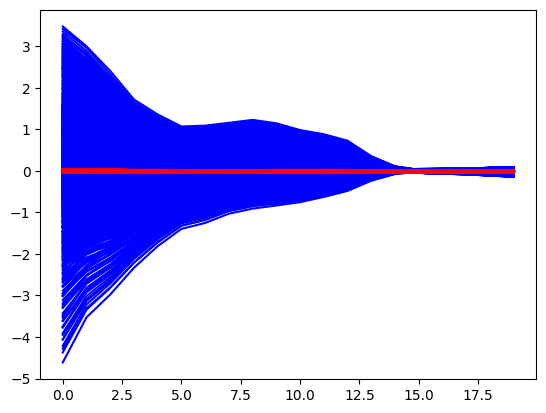

In [7]:
invivo_OD2_spec_set = result_OD2_spec
for SO2_idx in range(51):
    OD_spec = prediction_input[SO2_idx,:800]
    for i in range(20):
        plt.plot(OD_spec[i*20:i*20+20], 'b')
for invivo_spec in result_diff_spec:
    for i in range(20):
        plt.plot(invivo_spec[i*20:i*20+20], 'r')
plt.show()

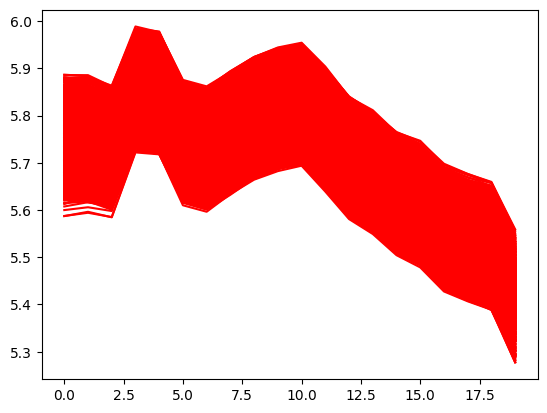

In [8]:
for invivo_OD2_spec in invivo_OD2_spec_set:
    for i in range(20):
        plt.plot(invivo_OD2_spec[i*20:i*20+20], 'r')
plt.show()

In [9]:
result_diff_spec.shape

(84, 800)

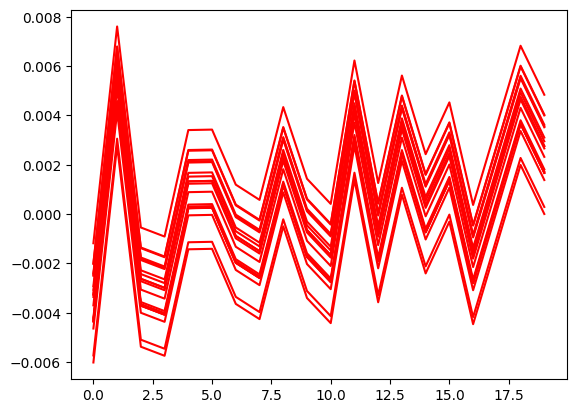

In [10]:
for invivo_spec in result_diff_spec[:1]:
    for i in range(20):
        plt.plot(invivo_spec[i*20:i*20+20], 'r')
plt.show()

In [11]:
result_diff_spec.shape

(84, 800)

In [12]:
prediction_input.shape

(51, 805)

In [13]:
os.makedirs(os.path.join('pic', 'ctchen', 'invivo'), exist_ok=True)

In [14]:
def find_best_sol(invivo_diff_spec):
    min_RMSPE = 1000000000
    for id in range(1):
        print(f'now processing test_{id}...')
        for blc in bloodConc:
        # for blc in [138]:
            prediction_input = np.empty((len(test_SO2),2*len(wavelength)*len(wavelength)+5)) # T1_large_SDS1/SDS2 T1_small_SDS1/SDS2 T2_large_SDS1/SDS2 T2_small_SDS1/SDS2 bloodConc ans id
            for i, s in enumerate(test_SO2):
                
                surrogate_result_T1 = pd.read_csv(os.path.join("dataset", "surrogate_result", 'test', 
                                                            f'bloodConc_{blc}', 'SO2_0.7', f'{id}_test.csv'))
                surrogate_result_T2 = pd.read_csv(os.path.join("dataset", "surrogate_result", 'test', 
                                                            f'bloodConc_{blc}', f'SO2_{s}', f'{id}_test.csv'))
                for wl_idx in range(len(wavelength)):
                    T2_large_SDS2 = surrogate_result_T2['largeIJV_SDS2'].to_numpy()
                    T2_large_SDS1 = surrogate_result_T2['largeIJV_SDS1'][wl_idx]
                    T1_large_SDS2 = surrogate_result_T1['largeIJV_SDS2'].to_numpy()
                    T1_large_SDS1 = surrogate_result_T1['largeIJV_SDS1'][wl_idx]

                    T2_small_SDS2 = surrogate_result_T2['smallIJV_SDS2'].to_numpy()
                    T2_small_SDS1 = surrogate_result_T2['smallIJV_SDS1'][wl_idx]
                    T1_small_SDS2 = surrogate_result_T1['smallIJV_SDS2'].to_numpy()
                    T1_small_SDS1 = surrogate_result_T1['smallIJV_SDS1'][wl_idx]

                    prediction_input[i][wl_idx*20 : wl_idx*20+20] = T2_large_SDS1 /T2_large_SDS2 - T1_large_SDS1 /T1_large_SDS2
                    prediction_input[i][400+wl_idx*20 : 400+wl_idx*20+20] = T2_small_SDS1 / T2_small_SDS2  - T1_small_SDS1 / T1_small_SDS2
                    
            rmspe = np.sqrt(np.mean(np.square((prediction_input[:, :800] - invivo_diff_spec)/invivo_diff_spec), axis=1))
            rmspe_second_small = rmspe[np.argsort(rmspe)[1]]
            if rmspe_second_small < min_RMSPE:
                min_RMSPE = rmspe.min()
                used_rmspe = rmspe_second_small
                closest_idx = np.argsort(rmspe)[1]
                now_ijv_SO2 = (test_SO2[closest_idx] - 0.7)*100
                sim_spec = prediction_input[closest_idx][:800]
                invivo_spec = invivo_diff_spec
    
    return used_rmspe, closest_idx, now_ijv_SO2, sim_spec, invivo_spec

In [15]:
invivo_spec

array([-4.34866232e-03,  4.44104607e-03, -3.71014418e-03, -4.07704647e-03,
        2.40704735e-04,  2.59785130e-04, -1.97301559e-03, -2.58951565e-03,
        1.17146121e-03, -1.73363479e-03, -2.75308140e-03,  3.06206924e-03,
       -1.90739940e-03,  2.45120717e-03, -7.37323720e-04,  1.36217378e-03,
       -2.79570509e-03,  4.29579797e-04,  3.65923785e-03,  1.67253261e-03,
       -2.46066213e-03,  6.32904626e-03, -1.82214399e-03, -2.18904628e-03,
        2.12870492e-03,  2.14778532e-03, -8.50153992e-05, -7.01515465e-04,
        3.05946140e-03,  1.54365399e-04, -8.65081211e-04,  4.95006943e-03,
       -1.93992131e-05,  4.33920736e-03,  1.15067647e-03,  3.25017397e-03,
       -9.07704906e-04,  2.31757999e-03,  5.54723804e-03,  3.56053280e-03,
       -2.02245674e-03,  6.76725165e-03, -1.38393860e-03, -1.75084090e-03,
        2.56691031e-03,  2.58599070e-03,  3.53189985e-04, -2.63310081e-04,
        3.49766679e-03,  5.92570783e-04, -4.26875827e-04,  5.38827482e-03,
        4.18806171e-04,  

In [16]:
for invivo_idx in range(result_diff_spec.shape[0]):
    # rmspe = np.sqrt(np.mean(np.square((prediction_input[:, :800] - result_diff_spec[invivo_idx])/result_diff_spec[invivo_idx]), axis=1))
    # closest_idx = np.argsort(rmspe)[1]
    # now_ijv_SO2 = (test_SO2[closest_idx] - 0.7)*100

    # sim_spec = prediction_input[closest_idx][:800]
    # invivo_spec = result_diff_spec[invivo_idx]
    
    used_rmspe, closest_idx, now_ijv_SO2, sim_spec, invivo_spec = find_best_sol(invivo_diff_spec=result_diff_spec[invivo_idx])
    fig, ax = plt.subplots(5,4,figsize=(16,12))
    fig.suptitle(r'$\Delta$OD spectrum @ $\Delta$SO2 :' + f'{now_ijv_SO2:.2f}%, RMSPE : {used_rmspe:.2f}%', fontsize=20)
    sim_ijv_large_spec = []
    sim_ijv_small_spec = []
    ijv_large_spec = []
    ijv_small_spec = []
    for i in range(20):
        ijv_large_spec = invivo_spec[i*20:i*20+20]
        ijv_small_spec = invivo_spec[i*20+400:i*20+20+400]
        sim_ijv_large_spec = sim_spec[i*20:i*20+20]
        sim_ijv_small_spec = sim_spec[i*20+400:i*20+20+400]
        
        ax[i//4][i%4].plot(wavelength, sim_ijv_large_spec, linestyle='--', color = 'blue', label=r'$IJV_{large}$ sim')
        ax[i//4][i%4].plot(wavelength, sim_ijv_small_spec, linestyle='--', color = 'orange', label=r'$IJV_{small}$ sim')
        ax[i//4][i%4].plot(wavelength, ijv_large_spec, color = 'blue', label=r'$IJV_{large}$ in vivo')
        ax[i//4][i%4].plot(wavelength, ijv_small_spec, color = 'orange', label=r'$IJV_{small}$ in vivo')
        ax[i//4][i%4].set_xlabel("wavelength(nm)")
        ax[i//4][i%4].set_ylabel(f"$\Delta$OD")
        ax[i//4][i%4].title.set_text(f'based on {wavelength[i]} nm')
        # ax[i//4][i%4].legend()
    fig.tight_layout()
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
                                fancybox=True, shadow=True)
    plt.savefig(os.path.join("pic", 'ctchen', 'invivo', f"invivo_{invivo_idx+1}.png"), dpi=300, format='png', bbox_inches='tight')
    
    # plt.show()
    plt.close()

now processing test_0...
now processing test_0...


KeyboardInterrupt: 

In [5]:
for id in range(1):
    id = 150
    print(f'now processing test_{id}...')
    # for blc in bloodConc:
    for blc in [138]:
        prediction_input = np.empty((len(test_SO2),2*len(wavelength)*len(wavelength)+5)) # T1_large_SDS1/SDS2 T1_small_SDS1/SDS2 T2_large_SDS1/SDS2 T2_small_SDS1/SDS2 bloodConc ans id
        for i, s in enumerate(test_SO2):
            
            surrogate_result_T1 = pd.read_csv(os.path.join("dataset", "surrogate_result", 'test', 
                                                        f'bloodConc_{blc}', 'SO2_0.7', f'{id}_test.csv'))
            surrogate_result_T2 = pd.read_csv(os.path.join("dataset", "surrogate_result", 'test', 
                                                        f'bloodConc_{blc}', f'SO2_{s}', f'{id}_test.csv'))
            for wl_idx in range(len(wavelength)):
                T2_large_SDS2 = surrogate_result_T2['largeIJV_SDS2'].to_numpy()
                T2_large_SDS1 = surrogate_result_T2['largeIJV_SDS1'][wl_idx]
                T1_large_SDS2 = surrogate_result_T1['largeIJV_SDS2'].to_numpy()
                T1_large_SDS1 = surrogate_result_T1['largeIJV_SDS1'][wl_idx]

                T2_small_SDS2 = surrogate_result_T2['smallIJV_SDS2'].to_numpy()
                T2_small_SDS1 = surrogate_result_T2['smallIJV_SDS1'][wl_idx]
                T1_small_SDS2 = surrogate_result_T1['smallIJV_SDS2'].to_numpy()
                T1_small_SDS1 = surrogate_result_T1['smallIJV_SDS1'][wl_idx]

                prediction_input[i][wl_idx*20 : wl_idx*20+20] = T2_large_SDS1 /T2_large_SDS2 - T1_large_SDS1 /T1_large_SDS2
                prediction_input[i][400+wl_idx*20 : 400+wl_idx*20+20] = T2_small_SDS1 / T2_small_SDS2  - T1_small_SDS1 / T1_small_SDS2

now processing test_150...


In [17]:
result_OD1_spec.shape

(84, 800)

In [18]:
invivo_spec.mean()

0.001201502604287068

In [19]:
result_diff_spec = result_OD2_spec - result_OD1_spec
result_diff_spec.shape

(84, 800)

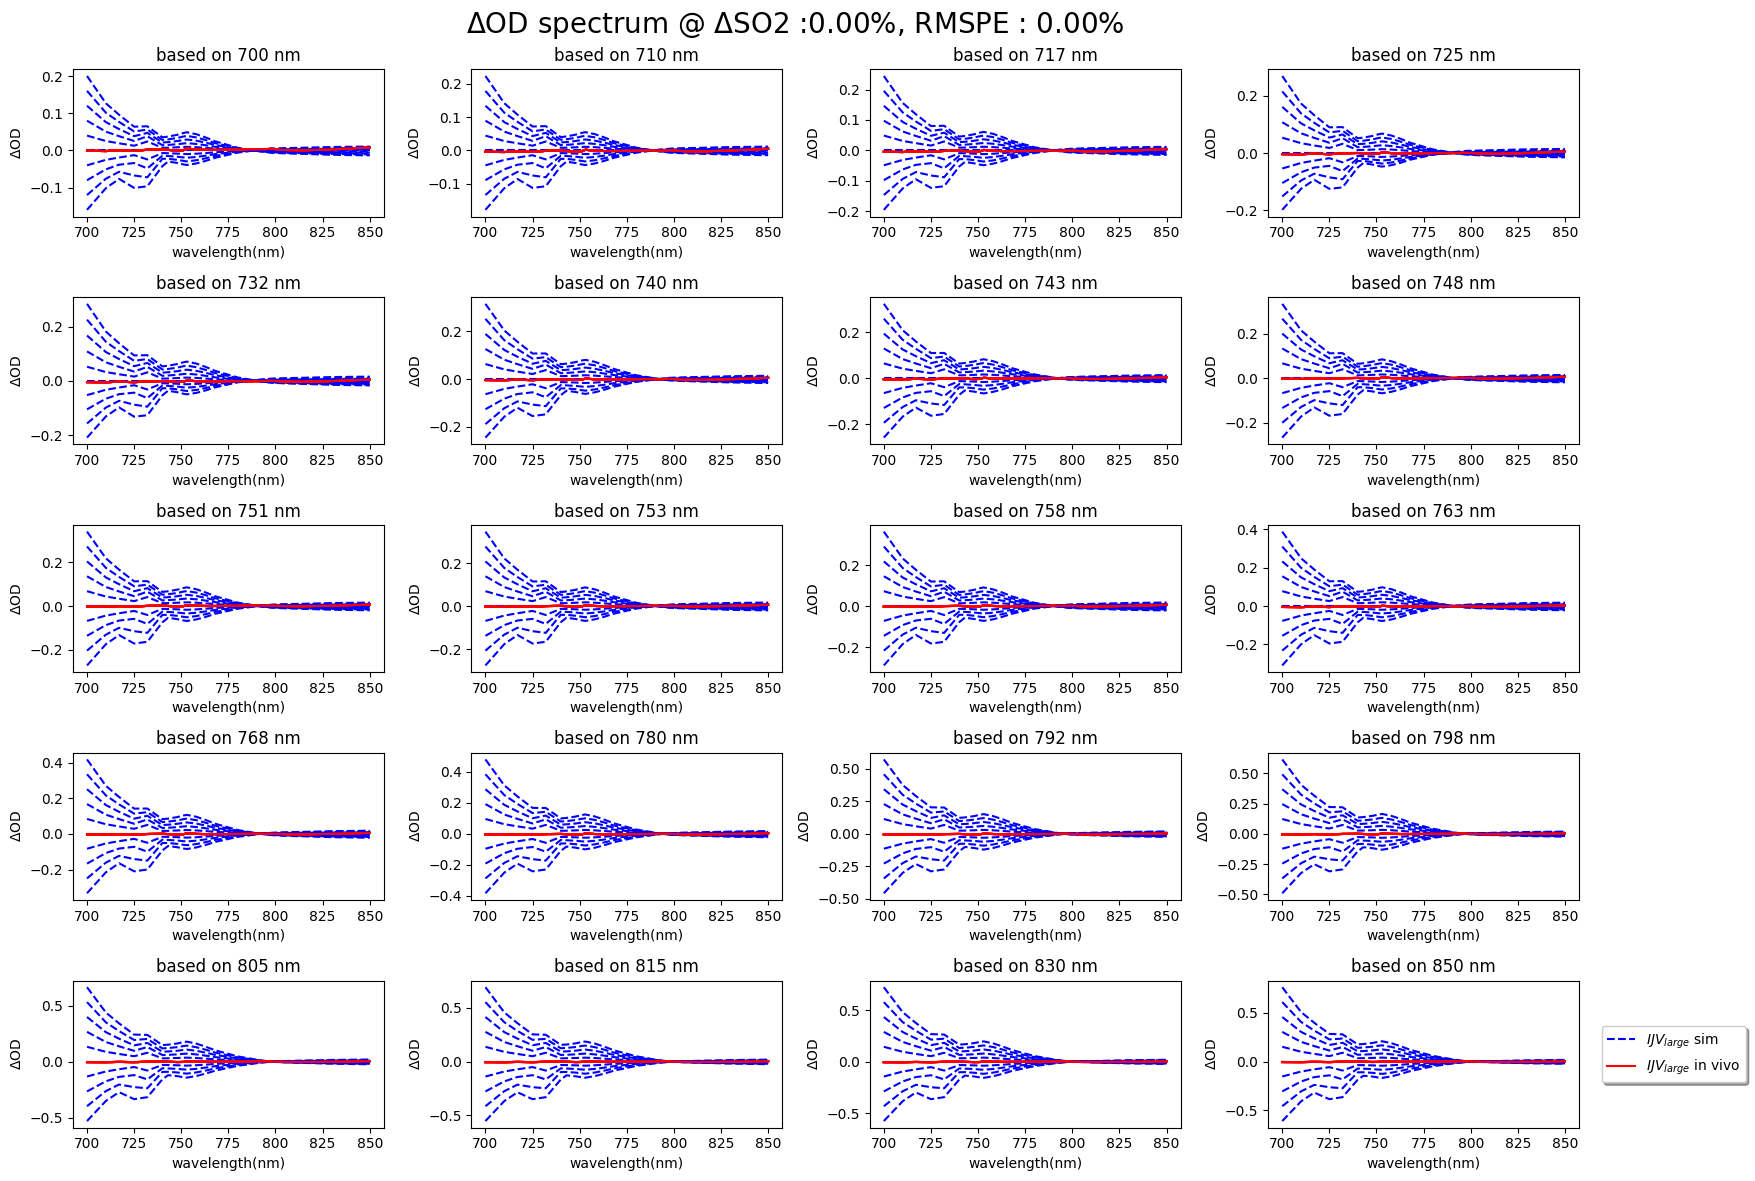

In [20]:
# sim_spec = prediction_input[33][:800]
invivo_spec = result_diff_spec[16]
now_ijv_SO2 = 0
used_rmspe = 0
# invivo_spec = (invivo_spec - invivo_spec.max())/ (invivo_spec.max()-invivo_spec.min())
fig, ax = plt.subplots(5,4,figsize=(16,12))
fig.suptitle(r'$\Delta$OD spectrum @ $\Delta$SO2 :' + f'{now_ijv_SO2:.2f}%, RMSPE : {used_rmspe:.2f}%', fontsize=20)
sim_ijv_large_spec = []
sim_ijv_small_spec = []
ijv_large_spec = []
ijv_small_spec = []

for label_idx, sim_spec in enumerate(prediction_input[25:35]):
    sim_spec = sim_spec[:800]
    # sim_spec = (sim_spec - prediction_input.max())/ (prediction_input.max()-prediction_input.min())
    for i in range(20):
        ijv_large_spec = invivo_spec[i*20:i*20+20]
        ijv_small_spec = invivo_spec[i*20+400:i*20+20+400]
        sim_ijv_large_spec = sim_spec[i*20:i*20+20]
        sim_ijv_small_spec = sim_spec[i*20+400:i*20+20+400]
        
        if label_idx == 0:
            ax[i//4][i%4].plot(wavelength, sim_ijv_large_spec, linestyle='--', color = 'blue', label=r'$IJV_{large}$ sim')
            # ax[i//4][i%4].plot(wavelength, sim_ijv_small_spec, linestyle='--', color = 'orange', label=r'$IJV_{small}$ sim')
            ax[i//4][i%4].plot(wavelength, ijv_large_spec, color = 'red', label=r'$IJV_{large}$ in vivo')
            # ax[i//4][i%4].plot(wavelength, ijv_small_spec, color = 'orange', label=r'$IJV_{small}$ in vivo')
        else:
            ax[i//4][i%4].plot(wavelength, sim_ijv_large_spec, linestyle='--', color = 'blue')
            ax[i//4][i%4].plot(wavelength, ijv_large_spec, color = 'red')
        ax[i//4][i%4].set_xlabel("wavelength(nm)")
        ax[i//4][i%4].set_ylabel(f"$\Delta$OD")
        ax[i//4][i%4].title.set_text(f'based on {wavelength[i]} nm')
        # ax[i//4][i%4].legend()
fig.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
                            fancybox=True, shadow=True)
plt.show()

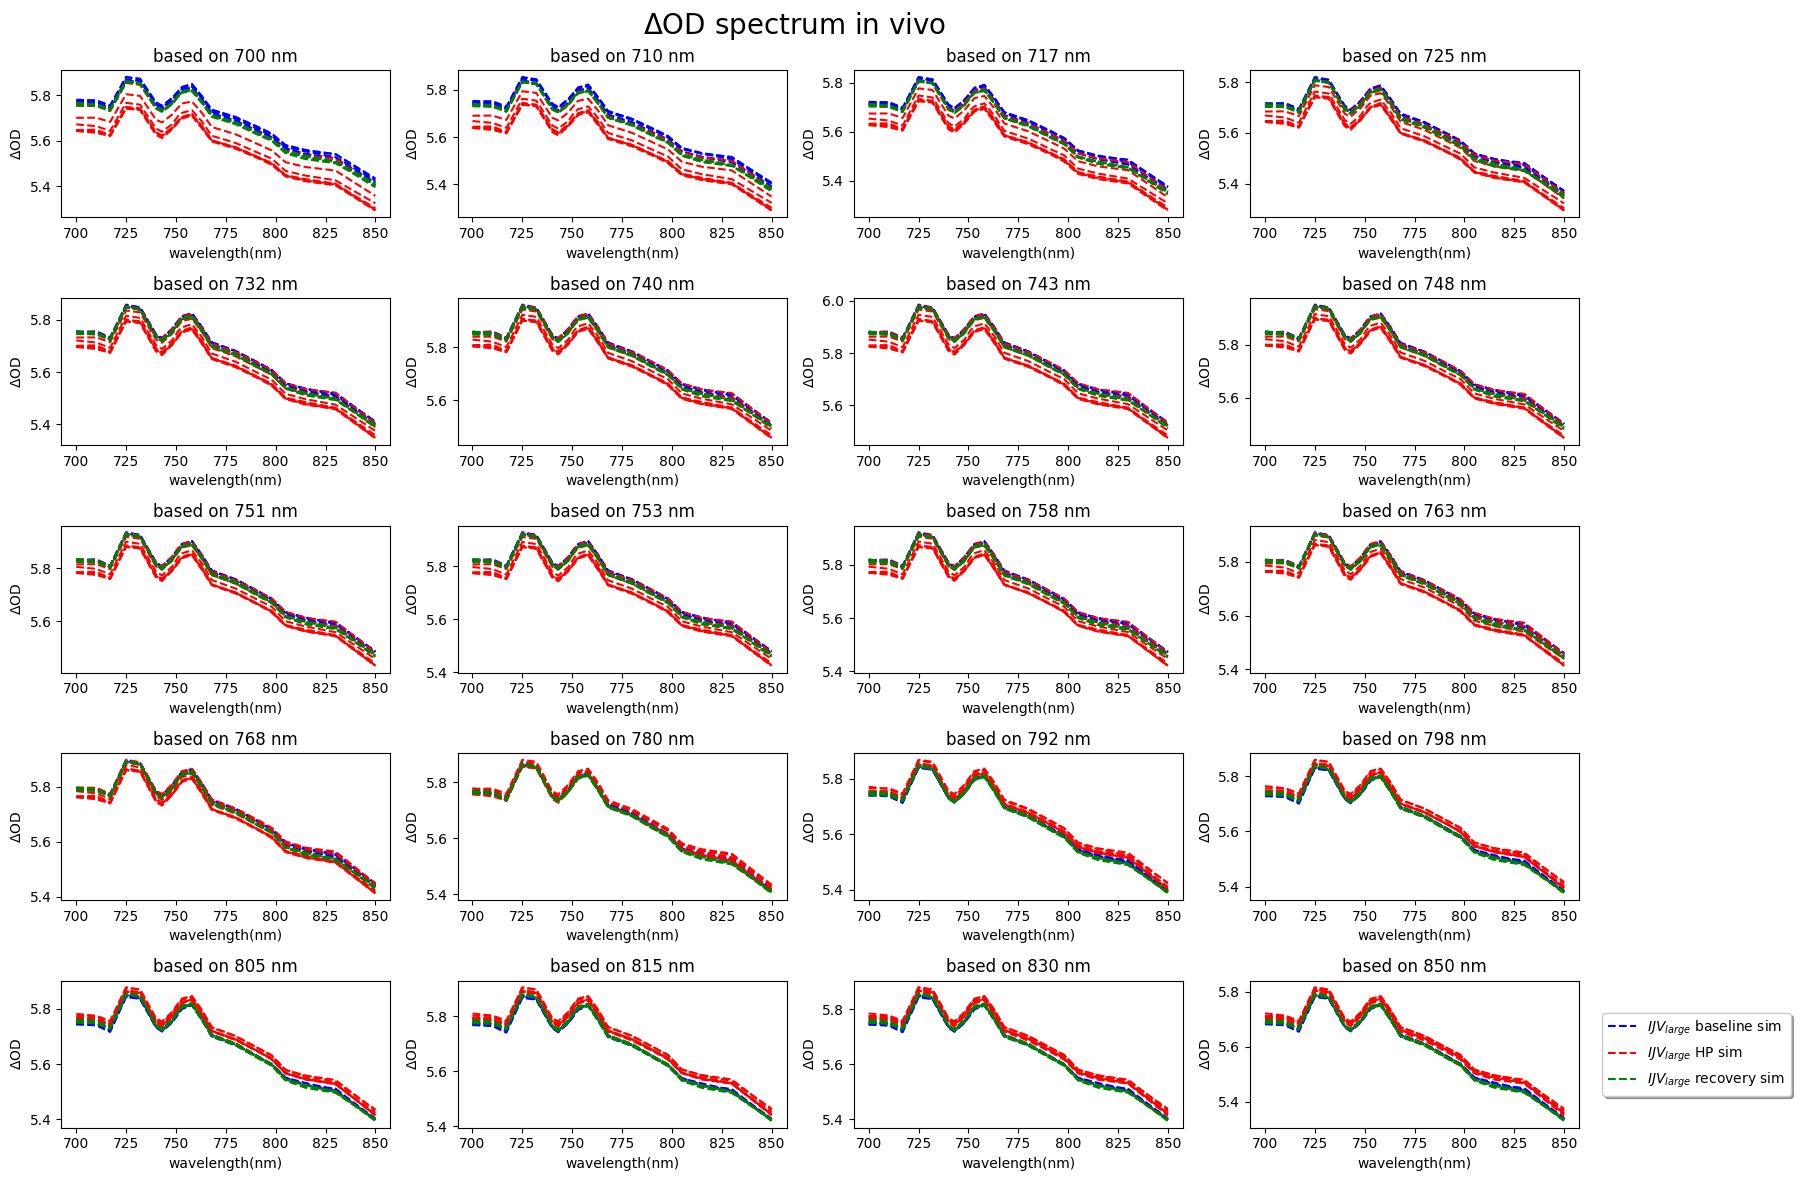

In [21]:
fig, ax = plt.subplots(5,4,figsize=(16,12))
fig.suptitle(r'$\Delta$OD spectrum in vivo', fontsize=20)
sim_ijv_large_spec = []
sim_ijv_small_spec = []
ijv_large_spec = []
ijv_small_spec = []
# invivo_spec = result_diff_spec[15]*10

baseline_spec_set = result_OD1_spec[:5]
HP_spec_set = result_OD1_spec[8:15]
recovery_spec_set = result_OD1_spec[-5:]
for i in range(20):
    # ijv_large_spec = invivo_spec[i*20:i*20+20]
    # ijv_small_spec = invivo_spec[i*20+400:i*20+20+400]
    # sim_ijv_large_spec = sim_spec[i*20:i*20+20]
    # sim_ijv_small_spec = sim_spec[i*20+400:i*20+20+400]
    for b_idx, baseline_spec in enumerate(baseline_spec_set):
        if (i==19) & (b_idx==0):
            ax[i//4][i%4].plot(wavelength, baseline_spec[i*20:i*20+20], linestyle='--', color = 'b', label=r'$IJV_{large}$ baseline sim')
        else:
            ax[i//4][i%4].plot(wavelength, baseline_spec[i*20:i*20+20], linestyle='--', color = 'b')
    for HP_idx, HP_spec in enumerate(HP_spec_set):
        if (i==19) & (HP_idx==0):
            ax[i//4][i%4].plot(wavelength, HP_spec[i*20:i*20+20], linestyle='--', color = 'r', label=r'$IJV_{large}$ HP sim')
        else:
            ax[i//4][i%4].plot(wavelength, HP_spec[i*20:i*20+20], linestyle='--', color = 'r')
    for r_idx, recovery_spec in enumerate(recovery_spec_set):
        if (i==19) & (r_idx==0):
            ax[i//4][i%4].plot(wavelength, recovery_spec[i*20:i*20+20], linestyle='--', color = 'g', label=r'$IJV_{large}$ recovery sim')
        else:
            ax[i//4][i%4].plot(wavelength, recovery_spec[i*20:i*20+20], linestyle='--', color = 'g')
    
    # ax[i//4][i%4].plot(wavelength, sim_ijv_large_spec, linestyle='--', color = 'blue', label=r'$IJV_{large}$ sim')
    # ax[i//4][i%4].plot(wavelength, sim_ijv_small_spec, linestyle='--', color = 'orange', label=r'$IJV_{small}$ sim')
    # ax[i//4][i%4].plot(wavelength, ijv_large_spec, color = 'blue', label=r'$IJV_{large}$ in vivo')
    # ax[i//4][i%4].plot(wavelength, ijv_small_spec, color = 'orange', label=r'$IJV_{small}$ in vivo')
    ax[i//4][i%4].set_xlabel("wavelength(nm)")
    ax[i//4][i%4].set_ylabel(f"$\Delta$OD")
    ax[i//4][i%4].title.set_text(f'based on {wavelength[i]} nm')
    # ax[i//4][i%4].legend()
fig.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
                            fancybox=True, shadow=True)
plt.show()